In [1]:
# Importing neccessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Readfing the dataset
df=pd.read_csv("/Users/akshathr/Downloads/heart_disease_data.csv")

In [3]:
# Performing Data Analysis
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head() # Top 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail() # Botton 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info() # Info about type of data and parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df=df.drop_duplicates() # Dropping duplicates (Looks like there was only one. But did it for formalities)

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [133]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


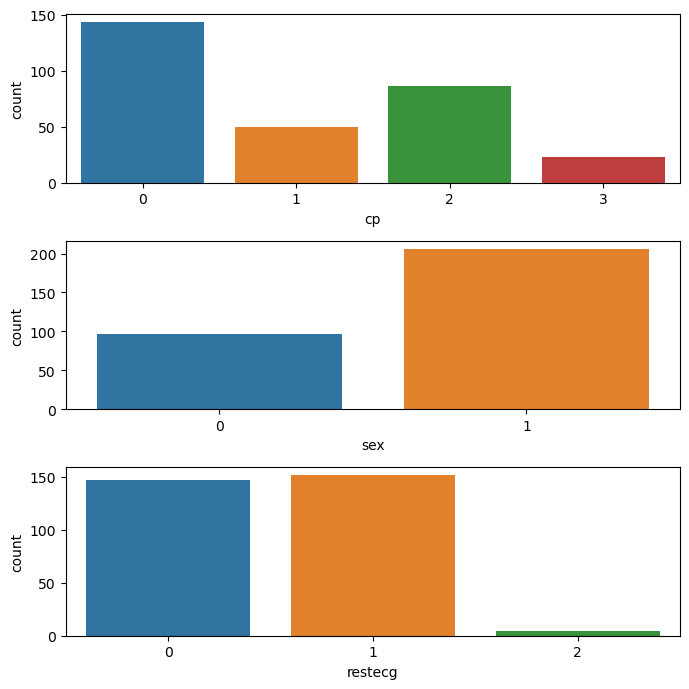

In [132]:
fig, axis = plt.subplots(3,figsize=(7,7))
sns.countplot(data=df,x="cp", ax=axis[0])
sns.countplot(data=df,x="sex", ax=axis[1])
sns.countplot(data=df,x="restecg", ax=axis[2])
plt.tight_layout()

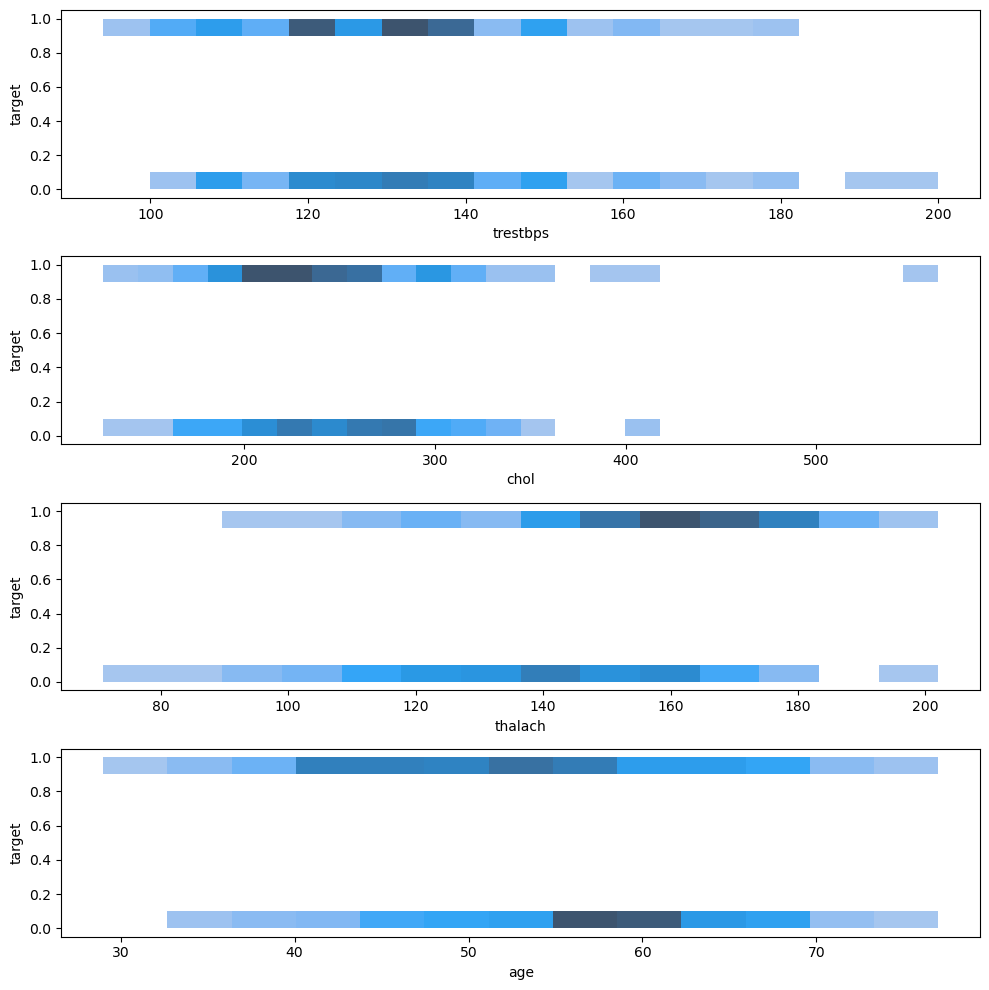

In [128]:
fig, axis = plt.subplots(4,figsize=(10,10))
sns.histplot(data=df,x="chol",y="target", ax=axis[1])
sns.histplot(data=df,x="trestbps",y="target", ax=axis[0])
sns.histplot(data=df,x="thalach",y="target", ax=axis[2])
sns.histplot(data=df,x="age",y="target", ax=axis[3])
plt.tight_layout()


# Analysis of Data:

* The mean age of the patients is 54 yrs and youngest being 29 and oldest being 77
* The people who have disease mostly have 120-140 rest blood presssure, 145-165 max heartrate, 200-230 cholestrol and ages between 40 to     55 years. These can be considered as symptoms for probably having a disease.
* 2/3rd of the dataset is of male and 1/3rd is of females
* Most of the patients have type 0 chest pain.
* For resting ecg, most people have type 0 and 1. Type 2 is very rare (almost negligible).

In [10]:
X=df.drop(["target"],axis=1) # Creating my X label

In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y=df['target'] # Creating my y label

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [14]:
# Spliting into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [16]:
y_train

37     1
16     1
126    1
291    0
273    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: target, Length: 202, dtype: int64

In [17]:
# Converting everyhting into numpy
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [18]:
X_train

array([[54.,  1.,  2., ...,  2.,  0.,  3.],
       [58.,  0.,  2., ...,  2.,  0.,  2.],
       [47.,  1.,  0., ...,  2.,  0.,  2.],
       ...,
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       [61.,  1.,  3., ...,  1.,  2.,  2.],
       [63.,  0.,  1., ...,  2.,  2.,  2.]])

In [19]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1])

In [64]:
# Building a 3 layer DNN model with sigmoid activation for output as it is a classification problem
model=tf.keras.Sequential([
    tf.keras.layers.Dense(13,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [65]:
# Compiling model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy','Precision',tf.keras.metrics.Recall.call])

In [68]:
model.fit(X_train,y_train,epochs=50) # Training the model

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7376 - precision: 0.7328 - call: 0.5843
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5157 - accuracy: 0.7376 - precision: 0.8000 - call: 0.5047
Epoch 3/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.7376 - precision: 0.7935 - call: 0.4983
Epoch 4/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.6980 - precision: 0.7091 - call: 0.5492
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7178 - precision: 0.7907 - call: 0.4835
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5495 - accuracy: 0.7129 - precision: 0.7207 - call: 0.5561
Epoch 7/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5066 - accuracy: 0.7129 - precision: 0.7526 - call: 0.5237
Epoch 8/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5411 - accu

In [134]:
metric=model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7900 - precision: 0.8214 - call: 0.5504


In [137]:
print("The Accuracy of Model is: ",metric[1])
print("The Precision of Model is: ",metric[2])
print("The Recall of Model is: ",metric[3])

The Accuracy of Model is:  0.7900000214576721
The Precision of Model is:  0.8214285969734192
The Recall of Model is:  0.5503713488578796


# Conclusion:

* As seen above the accuracy of model is about 80% and precision is 82% approx
* The model is performing good as the evaluated metrics are higher or closer to the training metrics.
* The dropout layer added prevents the neural network from overfitting.
* Due to the large number of parameter and less training data, the model metrics is not too high
* But with additional training data the metrics is guaranteed to increase.